In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [19]:
paths = [r"../../../outputs/results/batch_16356733_result.csv"]
labels = ["yes", "partially", "no"]

df = pd.read_csv(paths[0], sep=";")

ground_truth_cols = df.columns[11:14]
pred_cols = df.columns[-4:-1]

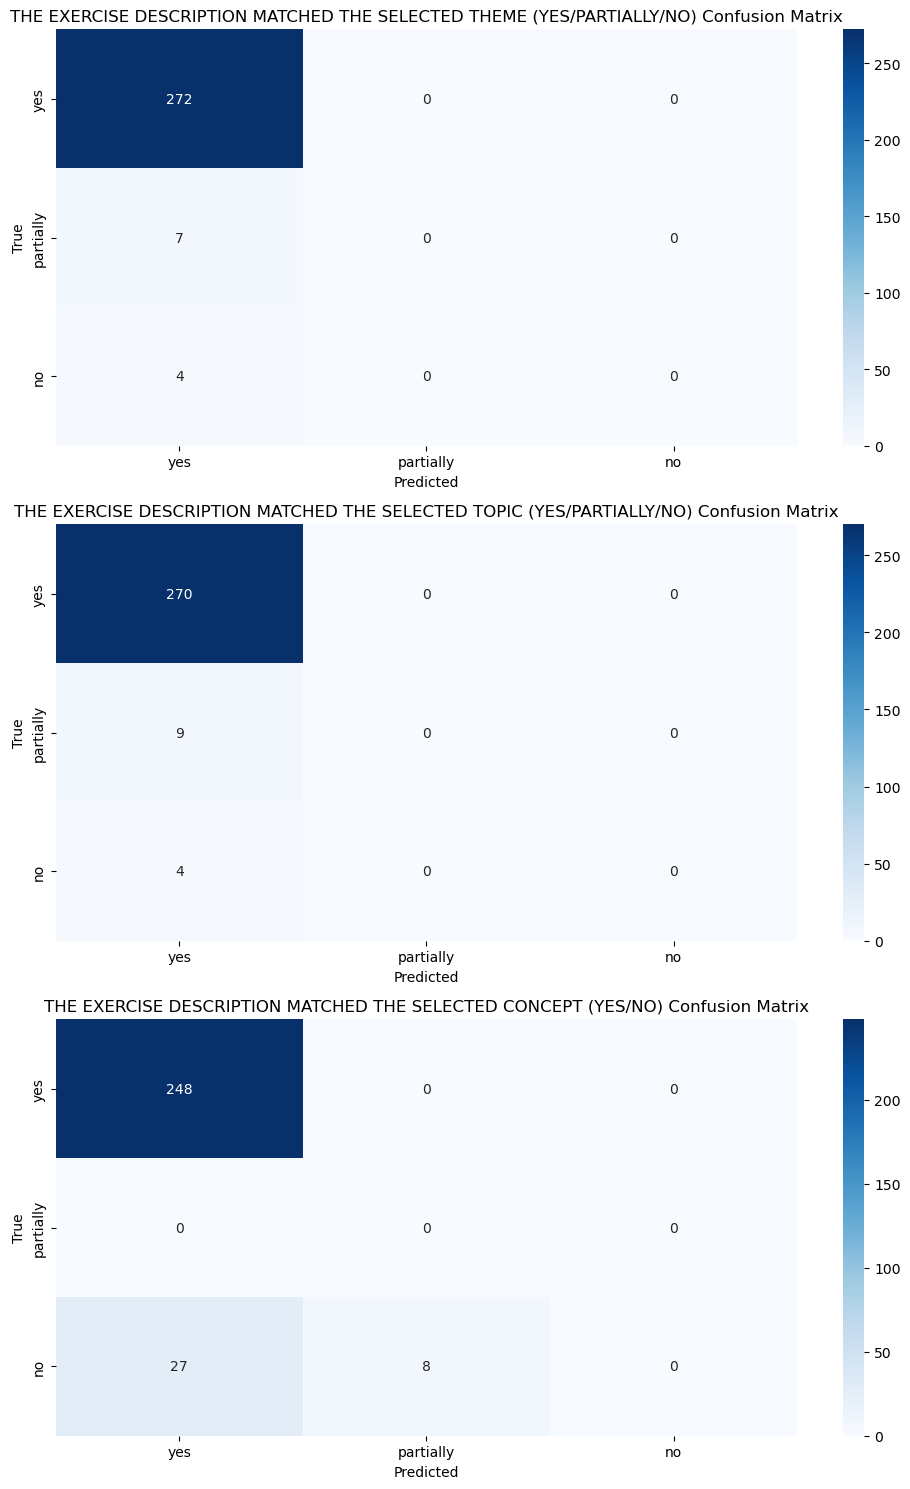

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for ax, col, pred_col in zip(axes, ground_truth_cols, pred_cols):
    cm = confusion_matrix(df[col], df[pred_col], labels=labels)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels,
        ax=ax
    )
    ax.set_title(f"{col.upper()} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

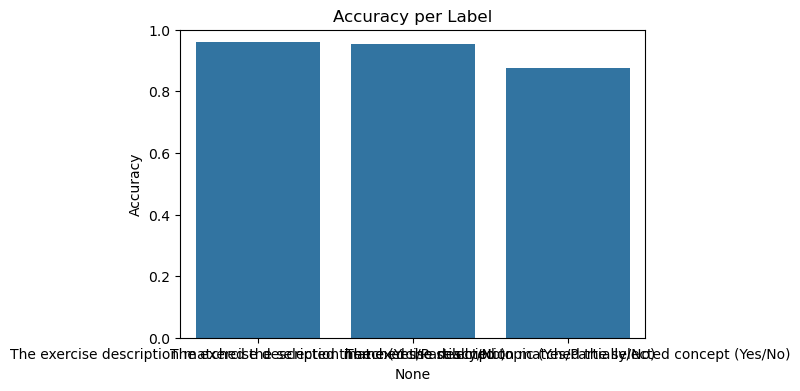

In [27]:
acc = []
for col, pred_col in zip(ground_truth_cols, pred_cols):
    acc.append((df[col] == df[pred_col]).mean())

plt.figure(figsize=(6, 4))
sns.barplot(x=ground_truth_cols, y=acc)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Accuracy per Label")
plt.show()

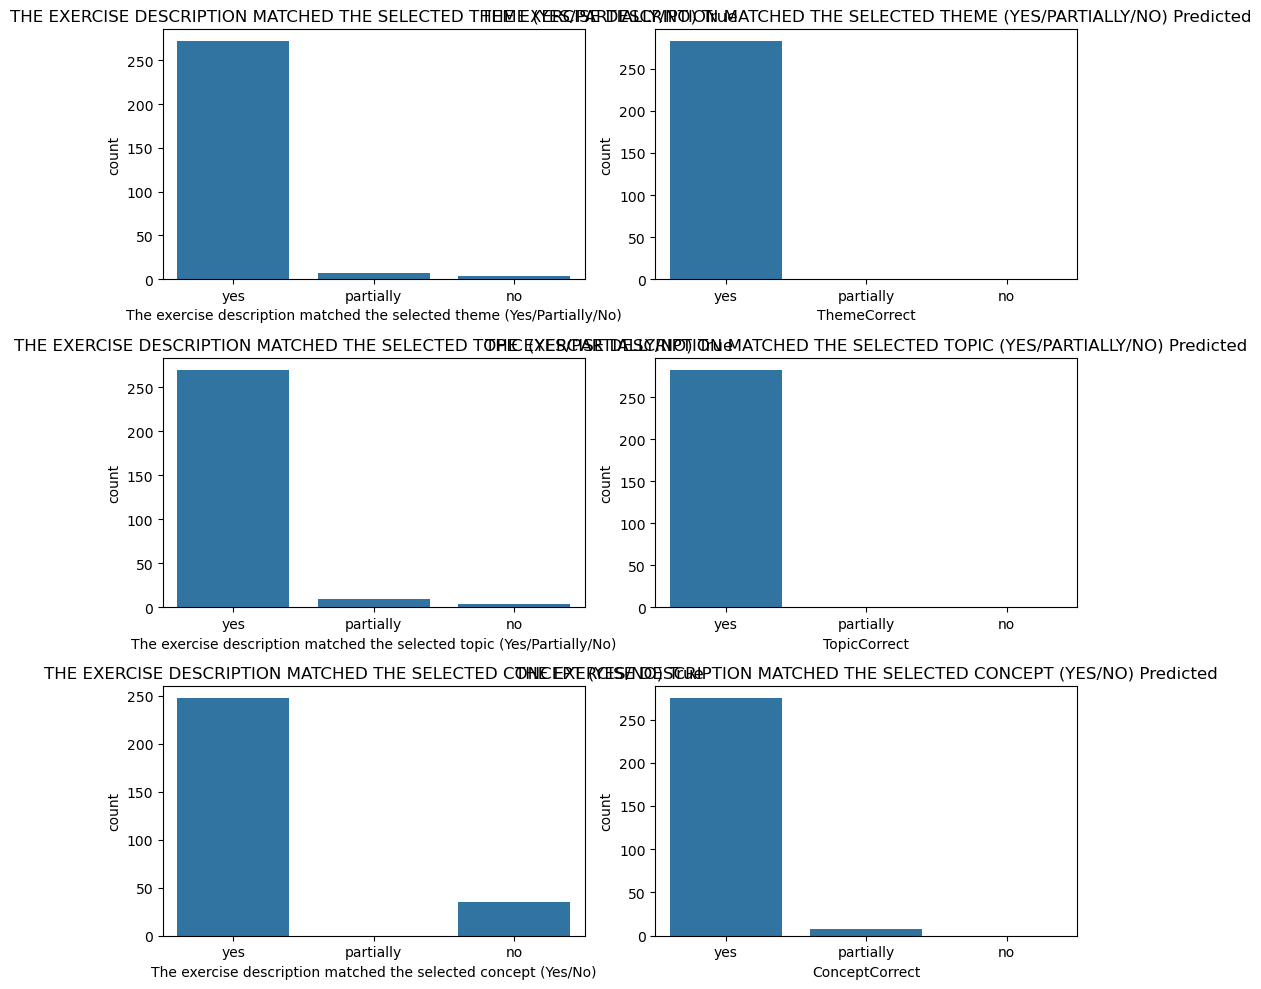

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i, (col, pred_col) in enumerate(zip(ground_truth_cols, pred_cols)):
    sns.countplot(x=df[col], order=["yes", "partially", "no"], ax=axes[i, 0])
    axes[i, 0].set_title(f"{col.upper()} True")

    sns.countplot(x=df[pred_col], order=["yes", "partially", "no"], ax=axes[i, 1])
    axes[i, 1].set_title(f"{col.upper()} Predicted")

plt.tight_layout()
plt.show()